# 2. What is the climate in Oslo between 1985 - 2014?

**2.1 Open the dataset and get familiar with it. What are the differences between MEPS and ERA5?**

In [1]:
# import various packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cy
from matplotlib.dates import DateFormatter

In [2]:
# I'm using the "2t_Amon_ERA5_1985_2014_Norway.nc" dataset from Franziska's directory

In [3]:
directory='https://github.com/ChristinaKappatou/GEO4902/tree/main/Python%20Introduction/python%20visualization'
ds = xr.open_dataset('2t_Amon_ERA5_1985_2014_Norway.nc') #use of xarray
ds

<xarray.Dataset> Size: 41MB
Dimensions:    (longitude: 117, latitude: 121, time: 360)
Coordinates:
  * longitude  (longitude) float32 468B 0.0 0.25 0.5 0.75 ... 28.5 28.75 29.0
  * latitude   (latitude) float32 484B 50.0 50.25 50.5 50.75 ... 79.5 79.75 80.0
  * time       (time) datetime64[ns] 3kB 1985-01-01 1985-02-01 ... 2014-12-01
Data variables:
    t2m        (time, latitude, longitude) float64 41MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-19 08:16:37 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

Differences: 
* indexes (MEPS has many models, pressure values and heights)
* time (MEPS only for 1 day, ERA5 from long ago until now)
* variables (ERA5 has only temperature at 2m)

**2.2 Change the 2-m temperature to deg C and assign the new attributes to your dataset. This is nice to do when you are plotting. xarray is looking for units, standard_name, and long_name when plotting.**

In [4]:
#We're working exactly the same way as with MEPS:

In [5]:
ds['t2m'] = ds['t2m'] - 273.15  # Convert from Kelvin to Celsius

# Now, the 't2m' variable in the dataset 'ds' is in degrees Celsius
print(ds['t2m'])

<xarray.DataArray 't2m' (time: 360, latitude: 121, longitude: 117)> Size: 41MB
array([[[  3.88552147,   3.14835865,   2.82845781, ..., -10.02494947,
         -10.04755116, -10.00756356],
        [  4.01765442,   3.77772879,   3.45782795, ..., -10.33789595,
         -10.37962215, -10.31529426],
        [  3.93072485,   3.71513949,   3.56214344, ..., -10.77254384,
         -10.74124919, -10.54652694],
        ...,
        [-10.89076806, -10.63345651, -10.37614497, ..., -12.80148017,
         -12.94752186, -13.07617763],
        [-11.23848637, -10.97769764, -10.71517032, ..., -12.63979116,
         -12.64152975, -12.69021031],
        [-11.66965707, -11.36888074, -11.10113764, ..., -12.65022271,
         -12.6519613 , -12.65717707]],

       [[  4.65224034,   4.1654347 ,   3.86987414, ..., -13.13181256,
         -13.34739791, -13.39955566],
        [  4.69918231,   4.42796203,   4.13414006, ..., -13.38738552,
         -13.63078834, -13.66729876],
        [  4.58443527,   4.31147639,   4.0

**2.3 Create a 30-year mean for each month by using xarray.DataArray.groupby and xarray.DataArray.mean.**

In [6]:
#Group by month
monthly_group = ds['t2m'].groupby('time.month')
print(monthly_group)

#Taking the mean of each group for each point on the grid (lat, lon)
monthly_mean = monthly_group.mean('time')
print(monthly_mean.shape)

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.
(12, 121, 117)


**2.4 Plot 2-m temperature, averaged over the 30 years per month from ERA5 on spatial map. Select the same month as your weather forecast, MEPS.**

(121, 117)


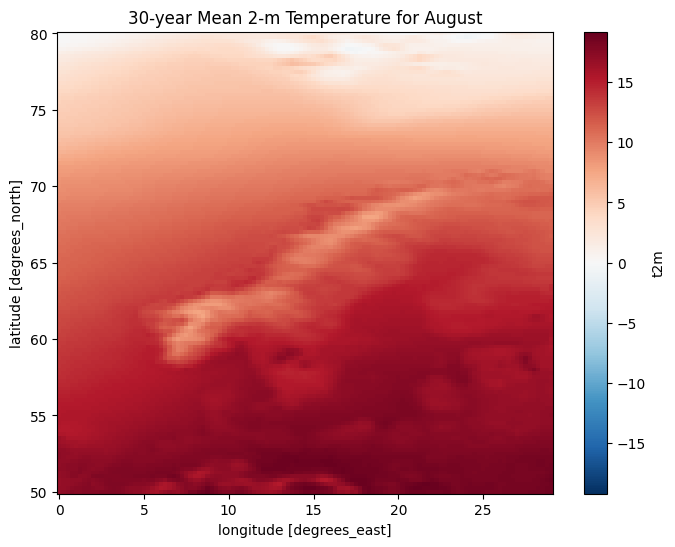

In [7]:
#Now that we have the average for every month for each point in the grid, we can make a 2D map. Let's work for August:

august_mean = monthly_mean.sel(month=8)
print(august_mean.shape)
fig, ax = plt.subplots(figsize=(8, 6))
august_mean.plot(ax=ax, cmap='RdBu_r', add_colorbar=True)
ax.set_title('30-year Mean 2-m Temperature for August')
plt.show()

#Because our latitude and longitude coordinates are truncated to the area we're interested in, we end up with a spatial, instead of a world map.

**2.5 Create some statistics for the 30 years and all months, such as mean, standard deviation, and 0.05, 0.95 percentiles. Plot the statistics on a spatial map.**

In [8]:
# Mean over all months and years
mean_t2m = ds['t2m'].mean(dim='time')

# Standard deviation over all months and years
std_t2m = ds['t2m'].std(dim='time')

# 5th and 95th percentiles over all months and years
p05_t2m = ds['t2m'].quantile(0.05, dim='time')
p95_t2m = ds['t2m'].quantile(0.95, dim='time')

Note: 'The median (population or sample) divides the data set into two parts of equal
size. To obtain finer measures of location, we could divide the data into more
than two such parts. Roughly speaking, quartiles divide the data set into four
equal parts, with the observations above the third quartile constituting the upper
quarter of the data set, the second quartile being identical to the median, and the
first quartile separating the lower quarter from the upper three-quarters.' 

[Jay L. Devore: 'Probability and statistics for engineering and the sciences', 8th Edition]

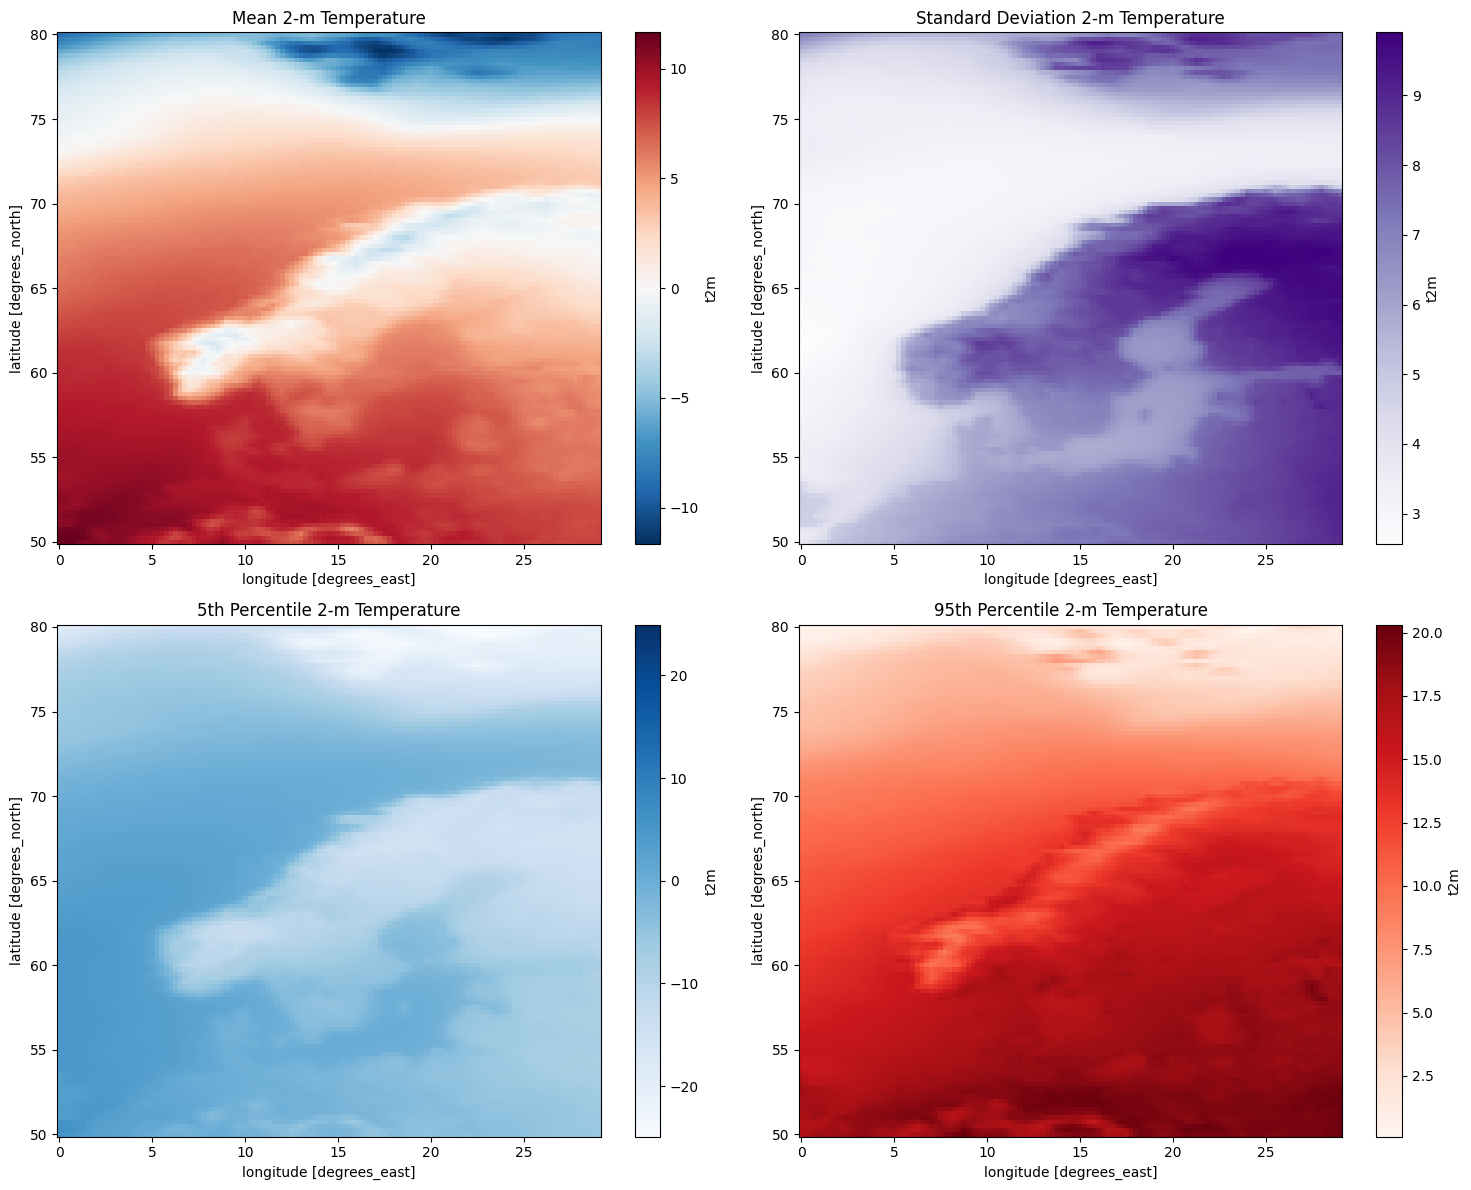

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot mean
mean_t2m.plot(ax=axes[0, 0], cmap='RdBu_r', add_colorbar=True)
axes[0, 0].set_title('Mean 2-m Temperature')

# Plot standard deviation
std_t2m.plot(ax=axes[0, 1], cmap='Purples', add_colorbar=True)
axes[0, 1].set_title('Standard Deviation 2-m Temperature')

# Plot 5th percentile
p05_t2m.plot(ax=axes[1, 0], cmap='Blues', add_colorbar=True)
axes[1, 0].set_title('5th Percentile 2-m Temperature')

# Plot 95th percentile
p95_t2m.plot(ax=axes[1, 1], cmap='Reds', add_colorbar=True)
axes[1, 1].set_title('95th Percentile 2-m Temperature')

plt.tight_layout()
plt.show()

**2.6 Select the closest grid point to Oslo Blindern and plot the 2-m temperature.**

latitude: 60.0; longitude: 10.75
(360, 121, 117)


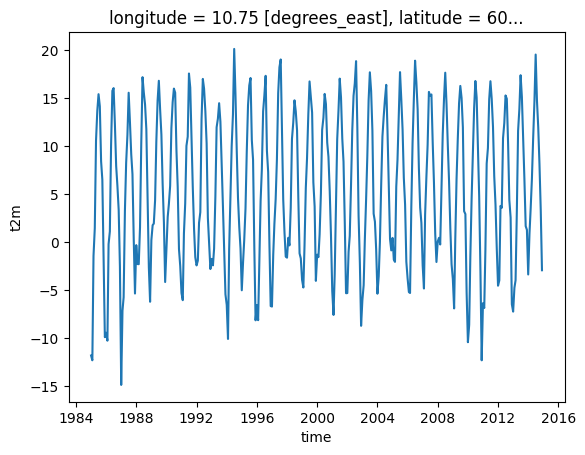

In [10]:
def findindex(alat, alon, plat, plon):
    
    abslat = np.abs(alat - plat)
    abslon = np.abs(alon - plon)

    lat_idx = np.argmin(abslat)
    lon_idx = np.argmin(abslon)

    return lat_idx, lon_idx

lat= 59.94
lon = 10.72

lat_idx, lon_idx = findindex(ds.latitude.values, ds.longitude.values, lat, lon)

# Get the actual latitude and longitude values
lat_value = ds.latitude.values[lat_idx]
lon_value = ds.longitude.values[lon_idx]
print('latitude: {}; longitude: {}'.format(round(lat_value, 2), round(lon_value, 2)))

print(ds.t2m.shape)
# Get the data value at the specified latitude and longitude
t2m_point = ds.t2m.isel(latitude=lat_idx, longitude=lon_idx)

#Single-point temperature forecast:

f, ax = plt.subplots()                                   # define figure

t2m_point.plot.line(ax = ax, x='time', add_legend=True)  # plot with xarray.plot function

**From ERA5 plot the 30-yr yearly-mean temperature.**

DataArrayGroupBy, grouped over 'year'
30 groups with labels 1985, 1986, 1987, ..., 2013, 2014.
(30, 121, 117)


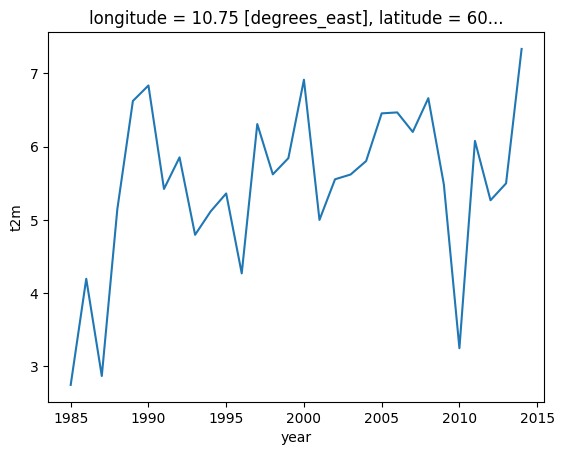

In [11]:
#Average over the years, so we end us with 30 points, one for each year-average:

yearly_average=ds['t2m'].groupby('time.year')

print(yearly_average)

#Taking the mean of each group for each point on the grid (lat, lon)
yearly_average = yearly_average.mean('time')
print(yearly_average.shape)

# Get the data value at the specified latitude and longitude
yearly_av_t2m = yearly_average.isel(latitude=lat_idx, longitude=lon_idx)

#Single-point temperature forecast:

f, ax = plt.subplots()                                   # define figure

yearly_av_t2m.plot.line(ax = ax, x='year', add_legend=True)  # plot with xarray.plot function

**Make another plot which shows temperature forecast of MEPS latest and the 30-yr climate average of the month of MEPS latest.**

We have already coded the plotting of the temperature forecast for MEPS latest, in Day_1.

Now, we will take the latest month from MEPS, which is August right now, and using the ERA dataset, we will create again a 30-points plot but this time we will have t2m averaged over 1 month of each year, rather than the whole year itself.

So, let's go!

<xarray.DataArray 't2m' (time: 30)> Size: 240B
array([14.16407467, 12.33159919, 12.51241271, 14.35184256, 13.84069665,
       15.57928819, 16.11999016, 13.6650989 , 12.5541389 , 15.38978171,
       17.11098734, 17.33874283, 19.03908536, 13.64249721, 15.09595974,
       14.39183016, 15.08552819, 18.86522621, 15.75488593, 16.39642621,
       14.8977603 , 16.68503241, 15.39673608, 14.38139862, 15.02641608,
       15.07161946, 14.93600932, 14.94470228, 15.12203861, 14.78996763])
Coordinates:
    longitude  float32 4B 10.75
    latitude   float32 4B 60.0
  * time       (time) datetime64[ns] 240B 1985-08-01 1986-08-01 ... 2014-08-01


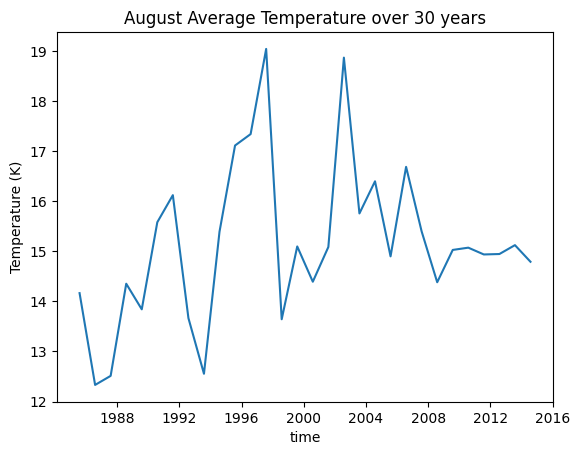

In [12]:
# Extract the 2m temperature data (all of it) for the specific point (Blindern)
t2m_point = ds.t2m.isel(latitude=lat_idx, longitude=lon_idx)

# Extracting August from each year (1 mean value per year)
august_data = t2m_point.sel(time=t2m_point['time'].dt.month == 8)
print(august_data)

# Plot the temp. values for August over the years
f, ax = plt.subplots()
august_data.plot(ax=ax)
plt.title('August Average Temperature over 30 years')
plt.ylabel('Temperature (K)')
plt.show()